# Classification Model  

## Training and Evaluating a classification model

*Supervised* machine learning techniques involve training a model to operate on a set of *features* and predict a *label* using a dataset that includes some already-known label values. You can think of this function like this, in which ***y*** represents the label we want to predict and ***X*** represents the vector of features the model uses to predict it.

$$y = f([x_1, x_2, x_3, ...])$$


*Classification* is a form of supervised machine learning in which you train a model to use the features (the ***x*** values in our function) to predict a label (***y***) that calculates the probability of the observed case belonging to each of a number of possible classes, and predicting an appropriate label. The simplest form of classification is *binary* classification, in which the label is 0 or 1, representing one of two classes; for example, "True" or "False"; "Internal" or "External"; "Profitable" or "Non-Profitable"; and so on. 

## Binary Classification

In this notebook, we will focus on an example of *binary classification*, where the model must predict a label that belongs to one of two classes. In this exercise, we'll train a binary classifier to predict whether or not a patient should be tested for diabetes based on some medical data.

In [1]:
import pandas as pd

In [4]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')


--2023-08-13 17:06:21--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 776415 (758K) [text/plain]
Saving to: 'diabetes.csv.1'

     0K .......... .......... .......... .......... ..........  6%  426K 2s
    50K .......... .......... .......... .......... .......... 13% 1.48M 1s
   100K .......... .......... .......... .......... .......... 19%  781K 1s
   150K .......... .......... .......... .......... .......... 26% 2.15M 1s
   200K .......... .......... .......... .......... .......... 32%  878K 1s
   250K .......... .......... .......... .......... .......... 39% 2.03M 0s
   300K .......... .......... .......... .......... .......... 46% 1.38M 0s
   350K .......... .....

In [5]:
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [6]:
diabetes.shape

(15000, 10)

In [7]:
diabetes.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [10]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [23]:
features=['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label=['Diabetic']

In [24]:
X=diabetes[features].values
y=diabetes[label].values

for n in range(0,4):
    print('Patient:',str(n+1),'\nFeatures:',list(X[n]),'\nLabels:',y[n])

Patient: 1 
Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
Labels: [0]
Patient: 2 
Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
Labels: [0]
Patient: 3 
Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
Labels: [0]
Patient: 4 
Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
Labels: [1]


In [25]:
diabetes.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


Now let's compare features distribution to each label.

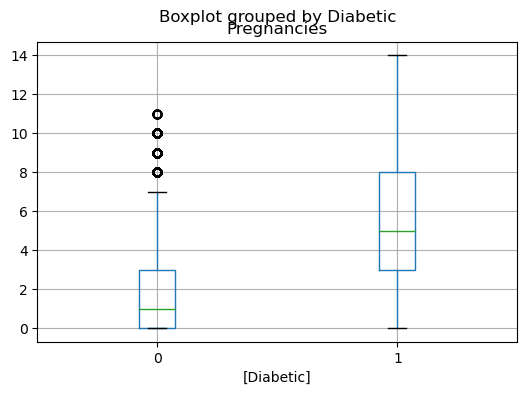

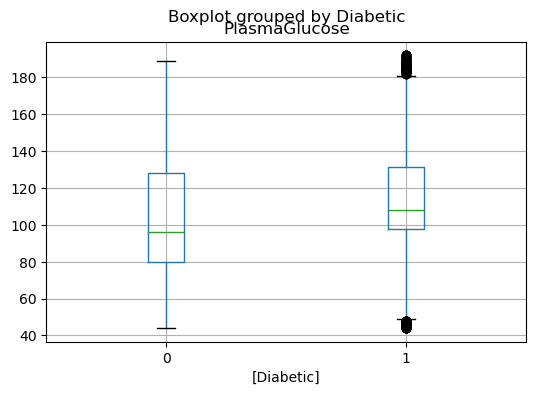

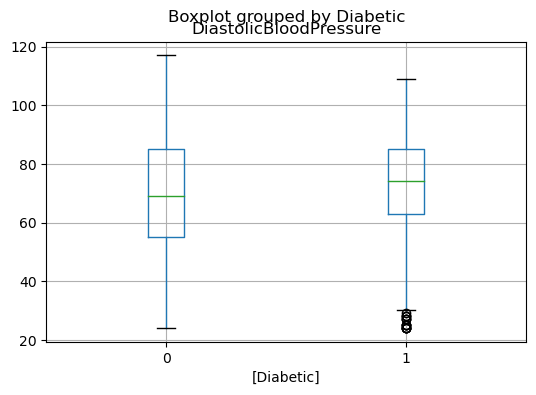

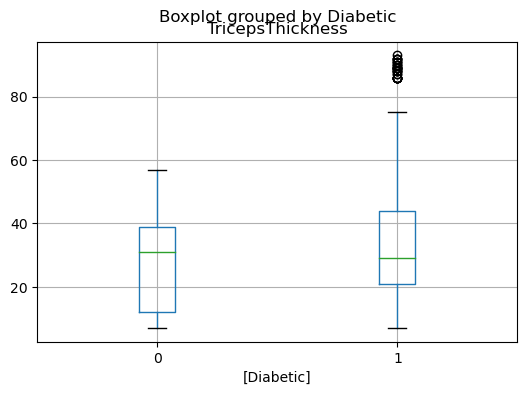

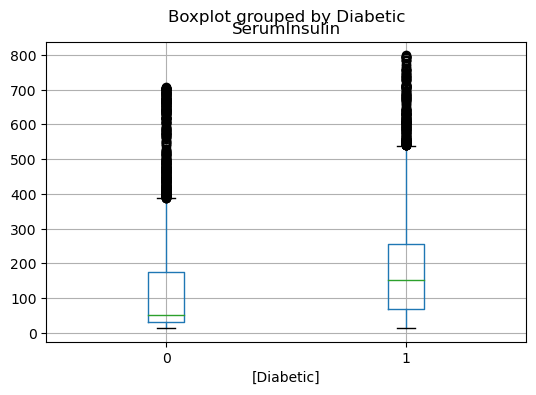

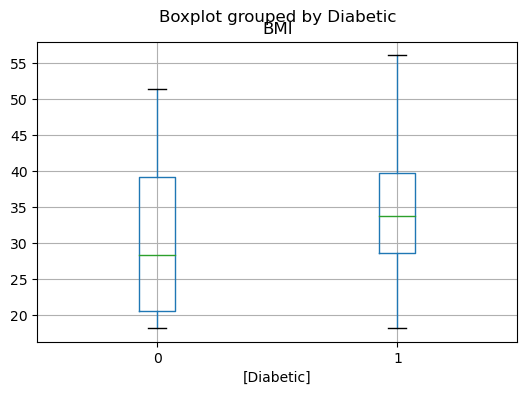

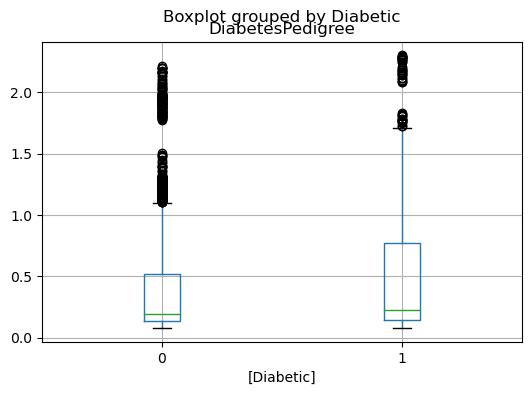

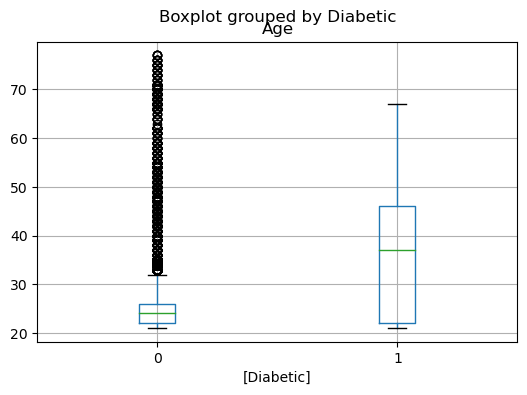

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline

features=['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    diabetes.boxplot(column=col,by=label,figsize=(6,4))
    plt.title(col)
plt.show()
    

For some of the features, there's a noticeable difference in the distribution for each label value. In particular, **Pregnancies** and **Age** show markedly different distributions for diabetic patients than for non-diabetic patients. These features may help predict whether or not a patient is diabetic.

## Split the dataset

In [75]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print("Training Cases:",str(X_train.shape),'\n','Test Cases:',str(X_test.shape))

Training Cases: (10500, 8) 
 Test Cases: (4500, 8)


## Train and evaluate the binary classification model
Now we're ready to train our model by fitting the training features (**X_train**) to the training labels (**y_train**). There are various algorithms we can use to train the model. In this example, we'll use *Logistic Regression*, which (despite its name) is a well-established algorithm for classification. In addition to the training features and labels, we'll need to set a *regularization* parameter. **This is used to counteract any bias in the sample, and help the model generalize well by avoiding *overfitting* the model to the training data.**

In [76]:
from sklearn.linear_model import LogisticRegression

# set the regularization rate
reg=0.01
model=LogisticRegression(C=1/reg,solver='liblinear').fit(X_train,y_train)

print(model)

LogisticRegression(C=100.0, solver='liblinear')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
prediction=model.predict(X_test)

print('Predicted Labels: ',prediction)
print('Actual Labels: ',y_test)

Predicted Labels:  [0 0 0 ... 0 1 0]
Actual Labels:  [[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]


## Performance Metrics

In [78]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,prediction)
print('Accuracy: ',accuracy)

Accuracy:  0.7893333333333333


In [34]:
features_1=['Pregnancies','BMI','Age']
label=['Diabetic']

In [36]:
X1=diabetes[features_1].values

array([[ 0.        , 43.50972593, 21.        ],
       [ 8.        , 21.24057571, 23.        ],
       [ 7.        , 41.51152348, 23.        ],
       ...,
       [ 0.        , 18.69068305, 24.        ],
       [ 0.        , 19.7916451 , 23.        ],
       [ 3.        , 36.21543653, 34.        ]])

In [38]:
for n in range(0,4):
    print("Patient",str(n+1),"\nFeatures:",list(X1[n]),"\nLabel",y[n])

Patient 1 
Features: [0.0, 43.50972593, 21.0] 
Label [0]
Patient 2 
Features: [8.0, 21.24057571, 23.0] 
Label [0]
Patient 3 
Features: [7.0, 41.51152348, 23.0] 
Label [0]
Patient 4 
Features: [9.0, 29.58219193, 43.0] 
Label [1]


In [44]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train,y_test = train_test_split(X1,y,test_size=0.3,random_state=0)



In [45]:
print('X_train size:',str(X_train1.shape),'\nX_test size:',str(X_test1.shape))

X_train size: (10500, 3) 
X_test size: (4500, 3)


In [46]:
from sklearn.linear_model import LogisticRegression

reg=0.01

model=LogisticRegression(C=1/reg,solver='liblinear').fit(X_train1,y_train)

print(model)

LogisticRegression(C=100.0, solver='liblinear')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
prediction1= model.predict(X_test1)
#print("Prediction",prediction)
#print("Actual value",y_test)


In [59]:
#performance metrics
accuracy=accuracy_score(y_test,prediction1)
accuracy

0.7497777777777778

## Alternative Metrics for Binary Classifier

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      2986
           1       0.66      0.53      0.59      1514

    accuracy                           0.75      4500
   macro avg       0.72      0.70      0.70      4500
weighted avg       0.74      0.75      0.74      4500



In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



The classification report includes the following metrics for each class  (0 and 1)

> note that the header row may not line up with the values!

* *Precision*: Of the predictions the model made for this class, what proportion were correct?
* *Recall*: Out of all of the instances of this class in the test dataset, how many did the model identify?
* *F1-Score*: An average metric that takes both precision and recall into account.
* *Support*: How many instances of this class are there in the test dataset?

The classification report also includes averages for these metrics, including a weighted average that allows for the imbalance in the number of cases of each class.

Because this is a *binary* classification problem, the ***1*** class is considered *positive* and its precision and recall are particularly interesting - these in effect answer the questions:

- Of all the patients the model predicted are diabetic, how many are actually diabetic?
- Of all the patients that are actually diabetic, how many did the model identify?

You can retrieve these values on their own by using the **precision_score** and **recall_score** metrics in scikit-learn (which by default assume a binary classification model).

In [80]:
#for considering all features
print('Overall Precision',precision_score(y_test,prediction))
print('Overall Recall',recall_score(y_test,prediction))

Overall Precision 0.7242472266244057
Overall Recall 0.6036988110964333


In [61]:
# for considering only 3 features pregnancies,age and bmi 
from sklearn.metrics import precision_score, recall_score
print('Overall Precision',precision_score(y_test,prediction1))
print('Overall Recall',recall_score(y_test,prediction1))

Overall Precision 0.6600660066006601
Overall Recall 0.5284015852047557


The precision and recall metrics are derived from four possible prediction outcomes:
* *True Positives*: The predicted label and the actual label are both 1.
* *False Positives*: The predicted label is 1, but the actual label is 0.
* *False Negatives*: The predicted label is 0, but the actual label is 1.
* *True Negatives*: The predicted label and the actual label are both 0.

These metrics are generally tabulated for the test set and shown together as a *confusion matrix*, which takes the following form:

<table style="border: 1px solid black;">
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="lightgray">TN</td><td style="border: 1px solid black;color: black;" bgcolor="white">FP</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="white">FN</td><td style="border: 1px solid black;color: black;" bgcolor="lightgray">TP</td>
    </tr>
</table>

Note that the correct (*true*) predictions form a diagonal line from top left to bottom right - these figures should be significantly higher than the *false* predictions if the model is any good.

In Python, you can use the **sklearn.metrics.confusion_matrix** function to find these values for a trained classifier:

In [62]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
print(cm)

[[2574  412]
 [ 714  800]]


In [81]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction)
print(cm)

[[2638  348]
 [ 600  914]]


Until now, we've considered the predictions from the model as being either 1 or 0 class labels. Actually, things are a little more complex than that. Statistical machine learning algorithms, like logistic regression, are based on *probability*; so what actually gets predicted by a binary classifier is the probability that the label is true (**P(y)**) and the probability that the label is false (1 - **P(y)**). A threshold value of 0.5 is used to decide whether the predicted label is a 1 (*P(y) > 0.5*) or a 0 (*P(y) <= 0.5*). You can use the **predict_proba** method to see the probability pairs for each case:

In [84]:
#y_score1=model.predict_proba(X_test1)
#print(y_score1)

In [85]:
y_score=model.predict_proba(X_test)
print(y_score)

[[0.81657116 0.18342884]
 [0.9630332  0.0369668 ]
 [0.80872619 0.19127381]
 ...
 [0.60692458 0.39307542]
 [0.10656641 0.89343359]
 [0.63859127 0.36140873]]


The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the *true positive rate* (which is another name for recall) and the *false positive rate* for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a *received operator characteristic (ROC) chart*, like this:

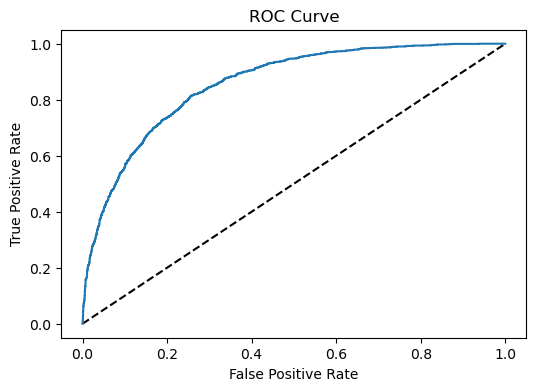

In [86]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

# calculate the roc curve
fpr,tpr,thresholds=roc_curve(y_test,y_score[:,1])
#plot Roc curve
fig=plt.figure(figsize=(6,4))
#plot the diagnol 50% line
plt.plot([0,1],[0,1],'k--')

# plot the fpr,tpr achieved by our model
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!).

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. Once again, scikit-Learn includes a function to calculate this metric.

In [87]:
from sklearn.metrics import roc_auc_score

auc=roc_auc_score(y_test,y_score[:,1])
print('AUC: ',str(auc))

AUC:  0.8568444904932839


The AUC (Area Under the Curve) value of 0.81 is indicating the performance of your model's Receiver Operating Characteristic (ROC) curve. The ROC curve is a graphical representation of a classification model's ability to distinguish between positive and negative classes across different thresholds.

Here's what the AUC value of 0.81 is generally telling you about your model's performance:

1. **Discriminative Power:** An AUC value of 0.81 is relatively good and suggests that your model has a reasonable ability to distinguish between the positive and negative classes. The higher the AUC value, the better the model's ability to separate the two classes.

2. **Class Separation:** An AUC of 0.81 means that your model is performing well in terms of correctly ranking instances of the positive class higher than instances of the negative class, on average.

3. **Prediction Confidence:** A higher AUC indicates that your model is making more confident and accurate predictions. In other words, the model is better at assigning higher predicted probabilities to positive instances compared to negative instances.

4. **Threshold Selection:** The ROC curve and its associated AUC value can help you choose an appropriate classification threshold based on your specific needs. Depending on the application, you might want to prioritize sensitivity (true positive rate) or specificity (true negative rate), and the ROC curve can guide you in finding the balance between these two metrics.

5. **Comparison with Other Models:** If you have multiple models, you can compare their AUC values to determine which one performs better in terms of classification accuracy.

However, keep in mind that the interpretation of AUC depends on the problem context and domain. An AUC of 0.81 might be excellent for some applications and might need improvement in others. Also, while AUC provides valuable information about model performance, it's essential to consider other evaluation metrics and domain-specific requirements when assessing your model's suitability for your specific task.

# Perform preprocessing in a pipeline

In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns(normalize them so they are on same scale)

numeric_features=[0,1,2,3,4,5,6]
numeric_transformer=Pipeline(steps=[
    ('scaler',StandardScaler())])

categorical_features=[7]
categorical_transformer=Pipeline(steps=[
    ('Onehot',OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor=ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_features),
        ('cat',categorical_transformer,categorical_features)])

# Create preprocessing and training pipeline
pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                         ('logregressor',LogisticRegression(C=1/reg,solver='liblinear'))])

# fit the pipeline to train a logistic regression model on the training set
model= pipeline.fit(X_train,(y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('Onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
from sklearn.metrics import confusion_matrix

Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202440539337694


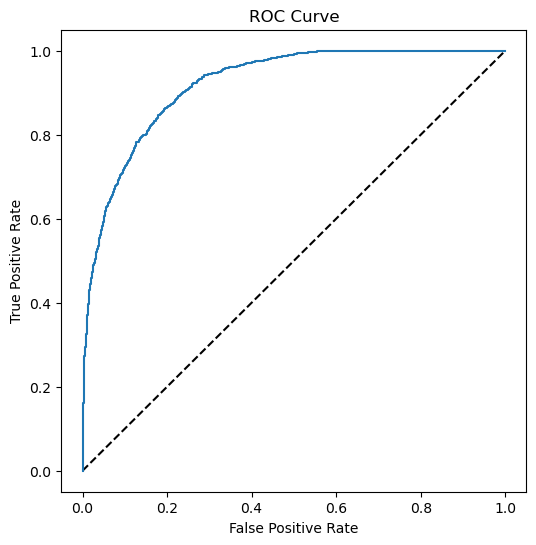

In [93]:
prediction=model.predict(X_test)
y_scores=model.predict_proba(X_test)

# get evaluation metric
cm=confusion_matrix(y_test,prediction)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, prediction))
print("Overall Precision:",precision_score(y_test, prediction))
print("Overall Recall:",recall_score(y_test, prediction))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Try a different algorithm

Now let's try a different algorithm. Previously we used a logistic regression algorithm, which is a *linear* algorithm. There are many kinds of classification algorithm we could try, including:

- **Support Vector Machine algorithms**: Algorithms that define a *hyperplane* that separates classes.
- **Tree-based algorithms**: Algorithms that build a decision tree to reach a prediction
- **Ensemble algorithms**: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.

This time, We'll use the same preprocessing steps as before, but we'll train the model using an *ensemble* algorithm named *Random Forest* that combines the outputs of multiple random decision trees (for more details, see the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)).

In [94]:
from sklearn.ensemble import RandomForestClassifier

pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                         ('logregressor',RandomForestClassifier(n_estimators=100))])

model=pipeline.fit(X_train,y_train)
print(model)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('Onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


Confusion Matrix: [[2860  126]
 [ 165 1349]] 

Accuracy: 0.9353333333333333
Overall Precision: 0.9145762711864407
Overall Recall: 0.8910171730515192

 AUC:0.9828687552037205


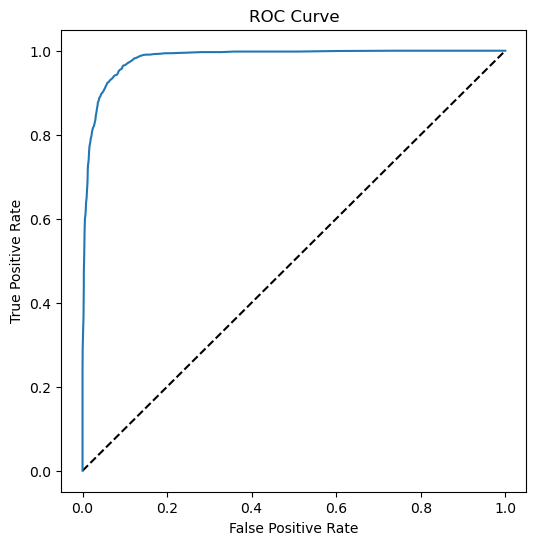

In [95]:
prediction=model.predict(X_test)
y_score=model.predict_proba(X_test)

cm=confusion_matrix(y_test,prediction)
print('Confusion Matrix:',cm,'\n')
print('Accuracy:',accuracy_score(y_test,prediction))
print('Overall Precision:',precision_score(y_test,prediction))
print("Overall Recall:",recall_score(y_test,prediction))
auc=roc_auc_score(y_test,y_score[:,1])
print('\n AUC:'+str(auc))

# calculate Roc curve
fpr,tpr,thresholds = roc_curve(y_test,y_score[:,1])

fig=plt.figure(figsize=(6,6))

plt.plot([0,1],[0,1],'k--')

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()

### Use the Model for Inferencing
Now that we have a reasonably useful trained model, we can save it for use later to predict labels for new data:

In [96]:
import joblib
filename= './diabetes_model.pkl'
joblib.dump(model,filename)

['./diabetes_model.pkl']

When we have some new observations for which the label is unknown, we can load the model and use it to predict values for the unknown label:

In [100]:
model=joblib.load(filename)
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new=np.array([[2,182,71,23,22,22.9091702,1.788172308,21]])
print('New Sample: {}'.format(list(X_new[0])))

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
pred=model.predict(X_new)
print('the predicted class is {}'.format(pred[0]))

New Sample: [2.0, 182.0, 71.0, 23.0, 22.0, 22.9091702, 1.788172308, 21.0]
the predicted class is 1
